In [1]:
#Importando bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA

In [2]:
#Importando conjunto de dados de treinamento e teste
treinamento = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [3]:
#Analisando conjunto de dados
treinamento.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
treinamento.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
584,585,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,133000
435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000
100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1375,1376,20,RL,89.0,10991,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,239000
622,623,20,RL,71.0,7064,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,135000
419,420,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,142000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
1241,1242,20,RL,83.0,9849,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,248328
392,393,20,RL,NaN,8339,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1200,7,2007,WD,Normal,106500


In [5]:
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Podemos verificar que o conjunto de dados possui atributos do tipo object, float64 e int64. Alguns atributos possuem dados nulos.

Text(0, 0.5, 'Preço de venda')

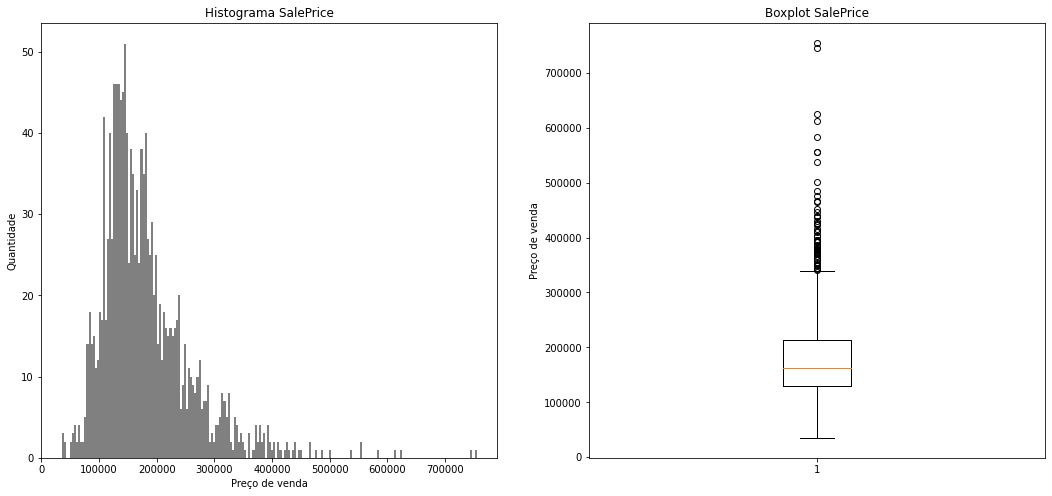

In [6]:
#Conhecendo a variável dependente SalePrice
fig = plt.figure(figsize = (18,8))
fig.add_subplot(1,2,1)
plt.hist(treinamento['SalePrice'], color = 'gray', bins = 200)
plt.title('Histograma SalePrice')
plt.ylabel('Quantidade')
plt.xlabel('Preço de venda')
fig.add_subplot(1,2,2)
plt.boxplot(treinamento['SalePrice'])
plt.title('Boxplot SalePrice')
plt.ylabel('Preço de venda')

Podemos verificar que SalePrice possui vários outliers e que os preços de venda estão majoritariamente concentrados entre 100000 e 200000.

In [7]:
#Separando os nomes das colunas de acordo com o tipo:
objeto = list(treinamento.select_dtypes(include = 'object').columns)
inteiro = list(treinamento.select_dtypes(include = 'int64').columns)
real = list(treinamento.select_dtypes(include = 'float64').columns)
print('Object: ', objeto, '\n\nInt64: ', inteiro, '\n\nFloat64:', real)

Object:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

Int64:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorc

In [8]:
#Trabalhando com os dados do tipo object:
treinamento[objeto].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [9]:
#Verificando dados nulos:
nulos = treinamento[objeto].isnull().sum()
nulos = nulos[nulos > 0].sort_values(ascending = False)
porcentagem = round((nulos / len(treinamento))*100, 2)
dfNulos = pd.DataFrame({'Valores':nulos, 'Porcentagem': porcentagem})
dfNulos

,Valores,Porcentagem
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
GarageType,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
GarageCond,81,5.55
BsmtExposure,38,2.60


In [10]:
#Removerei os dados que possuem mais de 50% de valores nulos:
maior50 = dfNulos['Porcentagem'].loc[dfNulos['Porcentagem']>50]
maior50 = list(maior50.index)
treinamento.drop(columns = maior50, inplace = True)
teste.drop(columns = maior50, inplace = True)
dfNulos.drop(index = maior50, inplace = True)
dfNulos

,Valores,Porcentagem
FireplaceQu,690,47.26
GarageType,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
GarageCond,81,5.55
BsmtExposure,38,2.60
BsmtFinType2,38,2.60
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtFinType1,37,2.53


Agora com base na descrição dos dados, farei a substituição dos valores nulos:

In [11]:
for index in dfNulos.index:
    print(index, ': \n', treinamento[index].value_counts(dropna=False), '\n\n')

FireplaceQu : 
 NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64 


GarageType : 
 Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 


GarageFinish : 
 Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64 


GarageQual : 
 TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64 


GarageCond : 
 TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64 


BsmtExposure : 
 No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64 


BsmtFinType2 : 
 Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 


BsmtQual : 
 TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64 


BsmtCond : 
 TA     1311
Gd       65
Fa      

In [12]:
#FireplaceQu: os NAs significam que as casas não possuem lareira
treinamento['FireplaceQu'].fillna(value = 'No fireplace', inplace = True)
teste['FireplaceQu'].fillna(value = 'No fireplace', inplace = True)
#GarageType, GarageFinish, GarageQual e GarageCond: os NAs significam que as casas não possuem garagem
treinamento['GarageType'].fillna(value = 'No garage', inplace = True)
teste['GarageType'].fillna(value = 'No garage', inplace = True)
treinamento['GarageFinish'].fillna(value = 'No garage', inplace = True)
teste['GarageFinish'].fillna(value = 'No garage', inplace = True)
treinamento['GarageQual'].fillna(value = 'No garage', inplace = True)
teste['GarageQual'].fillna(value = 'No garage', inplace = True)
treinamento['GarageCond'].fillna(value = 'No garage', inplace = True)
teste['GarageCond'].fillna(value = 'No garage', inplace = True)
#BsmtExposure, BsmtFinType2, BsmtQual, BsmtCond, BsmtFinType1: os NAs significam que as casas não possuem porão
treinamento['BsmtExposure'].fillna(value = 'No bsmt', inplace = True)
teste['BsmtExposure'].fillna(value = 'No bsmt', inplace = True)
treinamento['BsmtFinType2'].fillna(value = 'No bsmt', inplace = True)
teste['BsmtFinType2'].fillna(value = 'No bsmt', inplace = True)
treinamento['BsmtQual'].fillna(value = 'No bsmt', inplace = True)
teste['BsmtQual'].fillna(value = 'No bsmt', inplace = True)
treinamento['BsmtCond'].fillna(value = 'No bsmt', inplace = True)
teste['BsmtCond'].fillna(value = 'No bsmt', inplace = True)
treinamento['BsmtFinType1'].fillna(value = 'No bsmt', inplace = True)
teste['BsmtFinType1'].fillna(value = 'No bsmt', inplace = True)
#MasVnrType: é um acabamento na alvenaria externa, neste caso vou substituir os NAs pela moda None
treinamento['MasVnrType'].fillna(value = 'None', inplace = True)
teste['MasVnrType'].fillna(value = 'None', inplace = True)
#Electrical: tipo de sistema elétrico, vou substituir os NAs pela moda SBrkr
treinamento['Electrical'].fillna(value = 'SBrkr', inplace = True)
teste['Electrical'].fillna(value = 'SBrkr', inplace = True)

In [13]:
objeto = list(treinamento.select_dtypes(include = 'object').columns)
treinamento[objeto].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

Agora foram retirados todos os valores nulos das colunas do tipo object. Agora verificarei as colunas do tipo int64.

In [14]:
treinamento[inteiro].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [15]:
treinamento[inteiro].describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0.5, 0, 'YearBuilt')

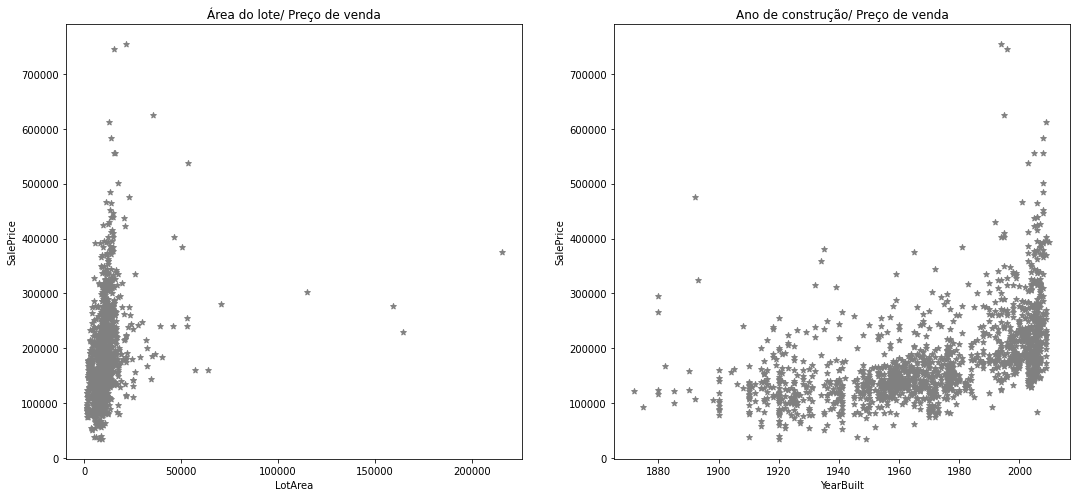

In [16]:
#Algumas análises gráficas dos atributos numéricos com relação a classe alvo:
#LotArea
fig = plt.figure(figsize = (18,8))
fig.add_subplot(1,2,1)
plt.scatter(x = treinamento['LotArea'], y = treinamento['SalePrice'], c= 'gray', marker = '*')
plt.title('Área do lote/ Preço de venda')
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
#YearBuilt
fig.add_subplot(1,2,2)
plt.scatter(x = treinamento['YearBuilt'], y = treinamento['SalePrice'], c= 'gray', marker = '*')
plt.title('Ano de construção/ Preço de venda')
plt.ylabel('SalePrice')
plt.xlabel('YearBuilt')

Podemos verificar que existem alguns Outliers em relação a área do lote, que não refletem em preços mais altos. Com relação ao ano de construção, podemos verificar uma linha tênue que mostra que casas mais novas vão tendo preços um pouco mais altos.

In [17]:
#Verificando se existem dados duplicados através da coluna Id
treinamento[treinamento.duplicated('Id')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Como não existem dados duplicados, vou excluir a coluna Id, pois não agrega em nada no modelo.

In [18]:
treinamento.drop(columns = 'Id', inplace = True)
teste.drop(columns = 'Id', inplace = True)

Agora farei análise dos atributos float64.

In [19]:
treinamento[real].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [20]:
treinamento[real].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [21]:
#Quantidade de nulos nas variáveis reais
treinamento[real].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

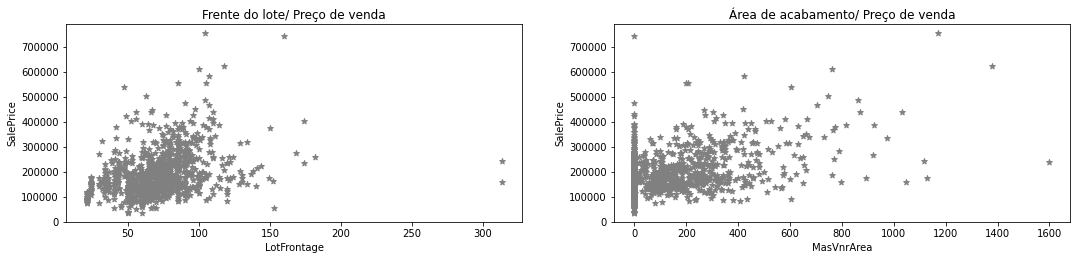

Text(0.5, 0, 'GarageYrBlt')

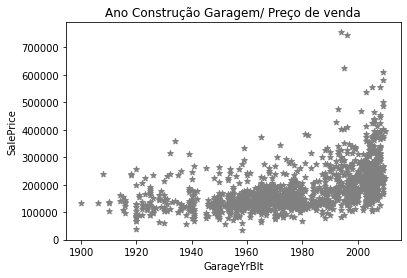

In [22]:
#Análise gráfica das variáveis em relação a classe alvo
#LotFrontage
fig = plt.figure(figsize = (18,8))
fig.add_subplot(2,2,1)
plt.scatter(x = treinamento['LotFrontage'], y = treinamento['SalePrice'], c= 'gray', marker = '*')
plt.title('Frente do lote/ Preço de venda')
plt.ylabel('SalePrice')
plt.xlabel('LotFrontage')
#MasVnrArea
fig.add_subplot(2,2,2)
plt.scatter(x = treinamento['MasVnrArea'], y = treinamento['SalePrice'], c= 'gray', marker = '*')
plt.title('Área de acabamento/ Preço de venda')
plt.ylabel('SalePrice')
plt.xlabel('MasVnrArea')
plt.show()
#GarageYrBlt
fig.add_subplot(2,2,3)
plt.scatter(x = treinamento['GarageYrBlt'], y = treinamento['SalePrice'], c= 'gray', marker = '*')
plt.title('Ano Construção Garagem/ Preço de venda')
plt.ylabel('SalePrice')
plt.xlabel('GarageYrBlt')

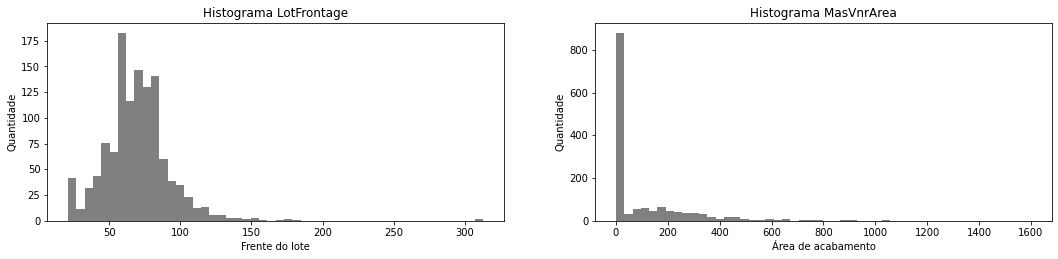

Text(0.5, 0, 'Ano de construção da garagem')

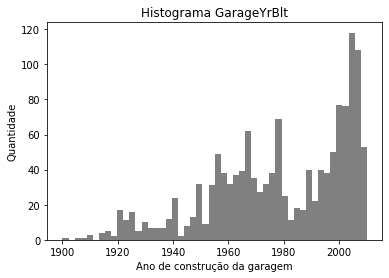

In [23]:
#Histograma dos atributos float64:
#LotFrontage
fig = plt.figure(figsize = (18,8))
fig.add_subplot(2,2,1)
plt.hist(treinamento['LotFrontage'], color = 'gray', bins = 50)
plt.title('Histograma LotFrontage')
plt.ylabel('Quantidade')
plt.xlabel('Frente do lote')
#MasVnrArea
fig.add_subplot(2,2,2)
plt.hist(treinamento['MasVnrArea'], color = 'gray', bins = 50)
plt.title('Histograma MasVnrArea')
plt.ylabel('Quantidade')
plt.xlabel('Área de acabamento')
plt.show()
#GarageYrBlt
fig.add_subplot(2,2,3)
plt.hist(treinamento['GarageYrBlt'], color = 'gray', bins = 50)
plt.title('Histograma GarageYrBlt')
plt.ylabel('Quantidade')
plt.xlabel('Ano de construção da garagem')

In [24]:
#GarageYrBlt é o ano de construção da garagem. Os NAs seriam casas sem garagem.
#Para construir o modelo, substituirei os NAs pela mediana.
medianaTreinamento = treinamento['GarageYrBlt'].median()
treinamento['GarageYrBlt'].fillna(value = medianaTreinamento, inplace = True)
medianaTeste = teste['GarageYrBlt'].median()
teste['GarageYrBlt'].fillna(value = medianaTeste, inplace = True)
#Agora, transformarei a coluna em inteiro, já que um ano não permite valores reais.
treinamento['GarageYrBlt'] = treinamento['GarageYrBlt'].astype('int64')
teste['GarageYrBlt'] = teste['GarageYrBlt'].astype('int64')

In [25]:
#MasVnrArea se refere a área do acabemento e os NAs representam casas sem acabamento.
#Neste caso, substituirei os NAs por 0.
treinamento['MasVnrArea'].fillna(value = 0, inplace = True)
teste['MasVnrArea'].fillna(value = 0, inplace = True)

In [26]:
#LotFrontage é o atributo com mais NAs. Analisarei a média e mediana.
mediaTreinamento = treinamento['LotFrontage'].mean()
medianaTreinamento = treinamento['LotFrontage'].median()
print('Média: ', mediaTreinamento, '\nMediana: ', medianaTreinamento)

Média:  70.04995836802665 
Mediana:  69.0


In [27]:
#Média e mediana estão próximas. Substituirei os valores faltantes pela mediana.
medianaTeste = teste['LotFrontage'].median()
treinamento['LotFrontage'].fillna(value = medianaTreinamento, inplace = True)
teste['LotFrontage'].fillna(value = medianaTeste, inplace = True)

In [28]:
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [29]:
nulosTeste = teste.isnull().sum()
nulosTeste = nulosTeste[nulosTeste > 0]
nulosTeste

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

Nos dados de teste, ainda ficaram algumas variáveis com valores nulos, que terão que ser tratadas.

In [30]:
for index in nulosTeste.index:
    print(index, ':\n', teste[index].value_counts(), '\n')

MSZoning :
 RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64 

Utilities :
 AllPub    1457
Name: Utilities, dtype: int64 

Exterior1st :
 VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64 

Exterior2nd :
 VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64 

BsmtFinSF1 :
 0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
         ... 
1337.0      1
656.0       1
706.0       1
496.0       1
337.0       1
Name: BsmtFinSF1, Length: 669, dtype: int64 

BsmtFinSF2 :
 0.0      1278
483.0       3
162.0       3
294.0       3
144.0       2
 

In [31]:
#Variáveis categóricas (substituindo pela moda)
#MSZoning
teste['MSZoning'].fillna(value = 'RL', inplace = True)

#Utilities 
teste['Utilities'].fillna(value = 'AllPub', inplace = True)

#Exterior1st 
teste['Exterior1st'].fillna(value = 'VinylSd', inplace = True)

#Exterior2nd 
teste['Exterior2nd'].fillna(value = 'VinylSd', inplace = True)

#KitchenQual 
teste['KitchenQual'].fillna(value = 'TA', inplace = True)

#Functional 
teste['Functional'].fillna(value = 'Typ', inplace = True)

#SaleType 
teste['SaleType'].fillna(value = 'WD', inplace = True)

In [32]:
#Variáveis numéricas (substituindo pela mediana)
#BsmtFinSF1
teste['BsmtFinSF1'].fillna(value = teste['BsmtFinSF1'].median(), inplace = True)

#BsmtFinSF2
teste['BsmtFinSF2'].fillna(value = teste['BsmtFinSF2'].median(), inplace = True)

#BsmtUnfSF
teste['BsmtUnfSF'].fillna(value = teste['BsmtUnfSF'].median(), inplace = True)

#TotalBsmtSF
teste['TotalBsmtSF'].fillna(value = teste['TotalBsmtSF'].median(), inplace = True)

#BsmtFullBath
teste['BsmtFullBath'].fillna(value = teste['BsmtFullBath'].median(), inplace = True)

#BsmtHalfBath
teste['BsmtHalfBath'].fillna(value = teste['BsmtHalfBath'].median(), inplace = True)

#GarageCars
teste['GarageCars'].fillna(value = teste['GarageCars'].median(), inplace = True)

#GarageArea
teste['GarageArea'].fillna(value = teste['GarageArea'].median(), inplace = True)

In [33]:
nulosTeste = teste.isnull().sum()
nulosTeste = nulosTeste[nulosTeste > 0]
nulosTeste

Series([], dtype: int64)

In [34]:
for objeto in treinamento[objeto].columns:
    print(objeto, ':\n', treinamento[objeto].value_counts(), '\n\n')

MSZoning :
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 


Street :
 Pave    1454
Grvl       6
Name: Street, dtype: int64 


LotShape :
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 


LandContour :
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 


Utilities :
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 


LotConfig :
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 


LandSlope :
 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 


Neighborhood :
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale   

Algumas colunas possuem pouca variação nos dados e podem prejudicar o modelo. Removerei estas colunas.

In [35]:
remover = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
treinamento.drop(columns = remover, inplace = True)
teste.drop(columns = remover, inplace = True)

Em algumas colunas não estão presentes todas as variáveis que constam no manual. Então farei um processo de Binning.

In [36]:
#MSZoning
treinamento.loc[treinamento['MSZoning'] == 'FV', 'MSZoning'] = 'Others'
treinamento.loc[treinamento['MSZoning'] == 'C (all)', 'MSZoning'] = 'Others'
treinamento.loc[treinamento['MSZoning'] == 'RH', 'MSZoning'] = 'Others'
treinamento.loc[treinamento['MSZoning'] == 'I', 'MSZoning'] = 'Others'
treinamento.loc[treinamento['MSZoning'] == 'RP', 'MSZoning'] = 'Others'
teste.loc[teste['MSZoning'] == 'FV', 'MSZoning'] = 'Others'
teste.loc[teste['MSZoning'] == 'C (all)', 'MSZoning'] = 'Others'
teste.loc[teste['MSZoning'] == 'RH', 'MSZoning'] = 'Others'
teste.loc[teste['MSZoning'] == 'I', 'MSZoning'] = 'Others'
teste.loc[teste['MSZoning'] == 'RP', 'MSZoning'] = 'Others'

#MasVnrType
treinamento.loc[treinamento['MasVnrType'] == 'BrkCmn', 'MasVnrType'] = 'Others'
treinamento.loc[treinamento['MasVnrType'] == 'Stone', 'MasVnrType'] = 'Others'
teste.loc[teste['MasVnrType'] == 'BrkCmn', 'MasVnrType'] = 'Others'
teste.loc[teste['MasVnrType'] == 'Stone', 'MasVnrType'] = 'Others'

#ExterQual
treinamento.loc[treinamento['ExterQual'] == 'Po', 'ExterQual'] = 'Fa'
teste.loc[teste['ExterQual'] == 'Po', 'ExterQual'] = 'Fa'

#ExterCond
treinamento.loc[treinamento['ExterCond'] == 'Po', 'ExterCond'] = 'Fa'
treinamento.loc[treinamento['ExterCond'] == 'Ex', 'ExterCond'] = 'Gd'
teste.loc[teste['ExterCond'] == 'Po', 'ExterCond'] = 'Fa'
teste.loc[teste['ExterCond'] == 'Ex', 'ExterCond'] = 'Gd'

#Foundation
treinamento.loc[treinamento['Foundation'] == 'Wood', 'Foundation'] = 'Others'
treinamento.loc[treinamento['Foundation'] == 'Stone', 'Foundation'] = 'Others'
teste.loc[teste['Foundation'] == 'Wood', 'Foundation'] = 'Others'
teste.loc[teste['Foundation'] == 'Stone', 'Foundation'] = 'Others'

#BsmtQual
treinamento.loc[treinamento['BsmtQual'] == 'Po', 'BsmtQual'] = 'Fa'
teste.loc[teste['BsmtQual'] == 'Po', 'BsmtQual'] = 'Fa'

#BsmtCond
treinamento.loc[treinamento['BsmtCond'] == 'Po', 'BsmtCond'] = 'Fa'
treinamento.loc[treinamento['BsmtCond'] == 'Ex', 'BsmtCond'] = 'Gd'
teste.loc[teste['BsmtCond'] == 'Po', 'BsmtCond'] = 'Fa'
teste.loc[teste['BsmtCond'] == 'Ex', 'BsmtCond'] = 'Gd'

#HeatingQC
treinamento.loc[treinamento['HeatingQC'] == 'Po', 'HeatingQC'] = 'Fa'
teste.loc[teste['HeatingQC'] == 'Po', 'HeatingQC'] = 'Fa'

#Electrical
treinamento.loc[treinamento['Electrical'] == 'FuseA', 'Electrical'] = 'Others'
treinamento.loc[treinamento['Electrical'] == 'FuseF', 'Electrical'] = 'Others'
treinamento.loc[treinamento['Electrical'] == 'FuseP', 'Electrical'] = 'Others'
treinamento.loc[treinamento['Electrical'] == 'Mix', 'Electrical'] = 'Others'
teste.loc[teste['Electrical'] == 'FuseA', 'Electrical'] = 'Others'
teste.loc[teste['Electrical'] == 'FuseF', 'Electrical'] = 'Others'
teste.loc[teste['Electrical'] == 'FuseP', 'Electrical'] = 'Others'
teste.loc[teste['Electrical'] == 'Mix', 'Electrical'] = 'Others'

#KitchenQual
treinamento.loc[treinamento['KitchenQual'] == 'Po', 'KitchenQual'] = 'Fa'
teste.loc[teste['KitchenQual'] == 'Po', 'KitchenQual'] = 'Fa'

#Functional
treinamento.loc[treinamento['Functional'] == 'Min2', 'Functional'] = 'Others'
treinamento.loc[treinamento['Functional'] == 'Min1', 'Functional'] = 'Others'
treinamento.loc[treinamento['Functional'] == 'Mod', 'Functional'] = 'Others'
treinamento.loc[treinamento['Functional'] == 'Maj1', 'Functional'] = 'Others'
treinamento.loc[treinamento['Functional'] == 'Maj2', 'Functional'] = 'Others'
treinamento.loc[treinamento['Functional'] == 'Sev', 'Functional'] = 'Others'
treinamento.loc[treinamento['Functional'] == 'Sal', 'Functional'] = 'Others'
teste.loc[teste['Functional'] == 'Min2', 'Functional'] = 'Others'
teste.loc[teste['Functional'] == 'Min1', 'Functional'] = 'Others'
teste.loc[teste['Functional'] == 'Mod', 'Functional'] = 'Others'
teste.loc[teste['Functional'] == 'Maj1', 'Functional'] = 'Others'
teste.loc[teste['Functional'] == 'Maj2', 'Functional'] = 'Others'
teste.loc[teste['Functional'] == 'Sev', 'Functional'] = 'Others'
teste.loc[teste['Functional'] == 'Sal', 'Functional'] = 'Others'

#SaleType
treinamento.loc[treinamento['SaleType'] == 'ConLD', 'SaleType'] = 'Oth'
treinamento.loc[treinamento['SaleType'] == 'ConLI', 'SaleType'] = 'Oth'
treinamento.loc[treinamento['SaleType'] == 'ConLw', 'SaleType'] = 'Oth'
treinamento.loc[treinamento['SaleType'] == 'CWD', 'SaleType'] = 'Oth'
treinamento.loc[treinamento['SaleType'] == 'Con', 'SaleType'] = 'Oth'
teste.loc[teste['SaleType'] == 'ConLD', 'SaleType'] = 'Oth'
teste.loc[teste['SaleType'] == 'ConLI', 'SaleType'] = 'Oth'
teste.loc[teste['SaleType'] == 'ConLw', 'SaleType'] = 'Oth'
teste.loc[teste['SaleType'] == 'CWD', 'SaleType'] = 'Oth'
teste.loc[teste['SaleType'] == 'Con', 'SaleType'] = 'Oth'

#SaleCondition
treinamento.loc[treinamento['SaleCondition'] == 'Family', 'SaleCondition'] = 'Others'
treinamento.loc[treinamento['SaleCondition'] == 'Alloca', 'SaleCondition'] = 'Others'
treinamento.loc[treinamento['SaleCondition'] == 'AdjLand', 'SaleCondition'] = 'Others'
teste.loc[teste['SaleCondition'] == 'Family', 'SaleCondition'] = 'Others'
teste.loc[teste['SaleCondition'] == 'Alloca', 'SaleCondition'] = 'Others'
teste.loc[teste['SaleCondition'] == 'AdjLand', 'SaleCondition'] = 'Others'

#GarageCond
treinamento.loc[treinamento['GarageCond'] == 'Po', 'GarageCond'] = 'Fa'
treinamento.loc[treinamento['GarageCond'] == 'Ex', 'GarageCond'] = 'Gd'
teste.loc[teste['GarageCond'] == 'Po', 'GarageCond'] = 'Fa'
teste.loc[teste['GarageCond'] == 'Ex', 'GarageCond'] = 'Gd'

#GarageQual
treinamento.loc[treinamento['GarageQual'] == 'Po', 'GarageQual'] = 'Fa'
treinamento.loc[treinamento['GarageQual'] == 'Ex', 'GarageQual'] = 'Gd'
teste.loc[teste['GarageQual'] == 'Po', 'GarageQual'] = 'Fa'
teste.loc[teste['GarageQual'] == 'Ex', 'GarageQual'] = 'Gd'

#GarageType
treinamento.loc[treinamento['GarageType'] == 'Basment', 'GarageType'] = 'Others'
treinamento.loc[treinamento['GarageType'] == 'CarPort', 'GarageType'] = 'Others'
treinamento.loc[treinamento['GarageType'] == '2Types', 'GarageType'] = 'Others'
teste.loc[teste['GarageType'] == 'Basment', 'GarageType'] = 'Others'
teste.loc[teste['GarageType'] == 'CarPort', 'GarageType'] = 'Others'
teste.loc[teste['GarageType'] == '2Types', 'GarageType'] = 'Others'

#RoofStyle
treinamento.loc[treinamento['RoofStyle'] == 'Flat', 'RoofStyle'] = 'Others'
treinamento.loc[treinamento['RoofStyle'] == 'Gambrel', 'RoofStyle'] = 'Others'
treinamento.loc[treinamento['RoofStyle'] == 'Mansard', 'RoofStyle'] = 'Others'
treinamento.loc[treinamento['RoofStyle'] == 'Shed', 'RoofStyle'] = 'Others'
teste.loc[teste['RoofStyle'] == 'Flat', 'RoofStyle'] = 'Others'
teste.loc[teste['RoofStyle'] == 'Gambrel', 'RoofStyle'] = 'Others'
teste.loc[teste['RoofStyle'] == 'Mansard', 'RoofStyle'] = 'Others'
teste.loc[teste['RoofStyle'] == 'Shed', 'RoofStyle'] = 'Others'

#Exterior1st
treinamento.loc[treinamento['Exterior1st'] == 'AsbShng', 'Exterior1st'] = 'Others'
treinamento.loc[treinamento['Exterior1st'] == 'Brk Cmn', 'Exterior1st'] = 'Others'
treinamento.loc[treinamento['Exterior1st'] == 'Stone', 'Exterior1st'] = 'Others'
treinamento.loc[treinamento['Exterior1st'] == 'AsphShn', 'Exterior1st'] = 'Others'
treinamento.loc[treinamento['Exterior1st'] == 'ImStucc', 'Exterior1st'] = 'Others'
treinamento.loc[treinamento['Exterior1st'] == 'CBlock', 'Exterior1st'] = 'Others'
teste.loc[teste['Exterior1st'] == 'AsbShng', 'Exterior1st'] = 'Others'
teste.loc[teste['Exterior1st'] == 'Brk Cmn', 'Exterior1st'] = 'Others'
teste.loc[teste['Exterior1st'] == 'Stone', 'Exterior1st'] = 'Others'
teste.loc[teste['Exterior1st'] == 'AsphShn', 'Exterior1st'] = 'Others'
teste.loc[teste['Exterior1st'] == 'ImStucc', 'Exterior1st'] = 'Others'
teste.loc[teste['Exterior1st'] == 'CBlock', 'Exterior1st'] = 'Others'

#Exterior2nd
treinamento.loc[treinamento['Exterior2nd'] == 'AsbShng', 'Exterior2nd'] = 'Other'
treinamento.loc[treinamento['Exterior2nd'] == 'BrkComm', 'Exterior2nd'] = 'Other'
treinamento.loc[treinamento['Exterior2nd'] == 'Stone', 'Exterior2nd'] = 'Other'
treinamento.loc[treinamento['Exterior2nd'] == 'AsphShn', 'Exterior2nd'] = 'Other'
treinamento.loc[treinamento['Exterior2nd'] == 'ImStucc', 'Exterior2nd'] = 'Other'
treinamento.loc[treinamento['Exterior2nd'] == 'CBlock', 'Exterior2nd'] = 'Other'
teste.loc[teste['Exterior2nd'] == 'AsbShng', 'Exterior2nd'] = 'Other'
teste.loc[teste['Exterior2nd'] == 'BrkComm', 'Exterior2nd'] = 'Other'
teste.loc[teste['Exterior2nd'] == 'Stone', 'Exterior2nd'] = 'Other'
teste.loc[teste['Exterior2nd'] == 'AsphShn', 'Exterior2nd'] = 'Other'
teste.loc[teste['Exterior2nd'] == 'ImStucc', 'Exterior2nd'] = 'Other'
teste.loc[teste['Exterior2nd'] == 'CBlock', 'Exterior2nd'] = 'Other'

In [37]:
objeto = list(treinamento.select_dtypes(include = 'object').columns)
for objeto in treinamento[objeto].columns:
    print(objeto, ':\n', treinamento[objeto].value_counts(), '\n\n')

MSZoning :
 RL        1151
RM         218
Others      91
Name: MSZoning, dtype: int64 


LotShape :
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 


LandContour :
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 


LotConfig :
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 


LandSlope :
 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 


Neighborhood :
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 


Condition1 :
 Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
R

Agora irei transformar as colunas categóricas em numéricas. As ordinais utilizando label encoder e as nominais utilizando one hot encoding.

In [38]:
#Label Encoder
#LotShape
map1 = {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0}
treinamento['LotShape'] = treinamento['LotShape'].map(map1)
teste['LotShape'] = teste['LotShape'].map(map1)

#LandContour
map2 = {'Low':0, 'HLS':1, 'Bnk':2, 'Lvl':3}
treinamento['LandContour'] = treinamento['LandContour'].map(map2)
teste['LandContour'] = teste['LandContour'].map(map2)

#LandSlope
map3 = {'Sev':0, 'Mod':1, 'Gtl':2}
treinamento['LandSlope'] = treinamento['LandSlope'].map(map3)
teste['LandSlope'] = teste['LandSlope'].map(map3)

#HouseStyle
map4 = {'SLvl':0, 'SFoyer':1, '2.5Unf':2, '2.5Fin':3, '2Story':4, '1.5Unf':5, '1.5Fin':6, '1Story':7}
treinamento['HouseStyle'] = treinamento['HouseStyle'].map(map4)
teste['HouseStyle'] = teste['HouseStyle'].map(map4)

#MasVnrType
map5 = {'None':0, 'Others':1, 'BrkFace':2}
treinamento['MasVnrType'] = treinamento['MasVnrType'].map(map5)
teste['MasVnrType'] = teste['MasVnrType'].map(map5)

#ExterQual
map6 = {'Fa':0, 'TA':1, 'Gd':2, 'Ex':3}
treinamento['ExterQual'] = treinamento['ExterQual'].map(map6)
teste['ExterQual'] = teste['ExterQual'].map(map6)

#ExterCond
map7 = {'Fa':0, 'TA':1, 'Gd':2}
treinamento['ExterCond'] = treinamento['ExterCond'].map(map7)
teste['ExterCond'] = teste['ExterCond'].map(map7)

#BsmtQual
map8 = {'No bsmt':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
treinamento['BsmtQual'] = treinamento['BsmtQual'].map(map8)
teste['BsmtQual'] = teste['BsmtQual'].map(map8)

#BsmtCond
map9 = {'No bsmt':0, 'Fa':1, 'TA':2, 'Gd':3}
treinamento['BsmtCond'] = treinamento['BsmtCond'].map(map9)
teste['BsmtCond'] = teste['BsmtCond'].map(map9)

#BsmtExposure
map10 = {'No bsmt':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
treinamento['BsmtExposure'] = treinamento['BsmtExposure'].map(map10)
teste['BsmtExposure'] = teste['BsmtExposure'].map(map10)

#BsmtFinType1
map11 = {'No bsmt':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
treinamento['BsmtFinType1'] = treinamento['BsmtFinType1'].map(map11)
teste['BsmtFinType1'] = teste['BsmtFinType1'].map(map11)

#BsmtFinType2
map12 = {'No bsmt':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
treinamento['BsmtFinType2'] = treinamento['BsmtFinType2'].map(map12)
teste['BsmtFinType2'] = teste['BsmtFinType2'].map(map12)

#HeatingQC
map13 = {'Fa':0, 'TA':1, 'Gd':2, 'Ex':3}
treinamento['HeatingQC'] = treinamento['HeatingQC'].map(map13)
teste['HeatingQC'] = teste['HeatingQC'].map(map13)

#KitchenQual
map14 = {'Fa':0, 'TA':1, 'Gd':2, 'Ex':3}
treinamento['KitchenQual'] = treinamento['KitchenQual'].map(map14)
teste['KitchenQual'] = teste['KitchenQual'].map(map14)

#FireplaceQu
map15 = {'No fireplace':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
treinamento['FireplaceQu'] = treinamento['FireplaceQu'].map(map15)
teste['FireplaceQu'] = teste['FireplaceQu'].map(map15)

#GarageType
map16 = {'No garage':0, 'Detchd':1, 'BuiltIn':2, 'Attchd':3, 'Others':4}
treinamento['GarageType'] = treinamento['GarageType'].map(map16)
teste['GarageType'] = teste['GarageType'].map(map16)

#GarageFinish
map17 = {'No garage':0, 'Unf':1, 'RFn':2, 'Fin':3}
treinamento['GarageFinish'] = treinamento['GarageFinish'].map(map17)
teste['GarageFinish'] = teste['GarageFinish'].map(map17)

#GarageQual
map18 = {'No garage':0, 'Fa':1, 'TA':2, 'Gd':3}
treinamento['GarageQual'] = treinamento['GarageQual'].map(map18)
teste['GarageQual'] = teste['GarageQual'].map(map18)

#GarageCond
map19 = {'No garage':0, 'Fa':1, 'TA':2, 'Gd':3}
treinamento['GarageCond'] = treinamento['GarageCond'].map(map19)
teste['GarageCond'] = teste['GarageCond'].map(map19)

#PavedDrive
map20 = {'N':0, 'P':1, 'Y':2}
treinamento['PavedDrive'] = treinamento['PavedDrive'].map(map20)
teste['PavedDrive'] = teste['PavedDrive'].map(map20)

#SaleType
map21 = {'Oth':0, 'COD':1, 'New':2, 'WD':3}
treinamento['SaleType'] = treinamento['SaleType'].map(map21)
teste['SaleType'] = teste['SaleType'].map(map21)

#SaleCondition
map22 = {'Partial':0, 'Others':1, 'Abnorml':2, 'Normal':3}
treinamento['SaleCondition'] = treinamento['SaleCondition'].map(map22)
teste['SaleCondition'] = teste['SaleCondition'].map(map22)

In [39]:
#LabelEncoder em colunas categóricas discretas, porém com grande quantidade de variáveis
#Neighborhood
label_encoder = LabelEncoder()
treinamento['Neighborhood'] = label_encoder.fit_transform(treinamento['Neighborhood'])
teste['Neighborhood'] = label_encoder.transform(teste['Neighborhood'])

#Condition1
label_encoder2 = LabelEncoder()
treinamento['Condition1'] = label_encoder2.fit_transform(treinamento['Condition1'])
teste['Condition1'] = label_encoder2.transform(teste['Condition1'])

#Exterior1st
label_encoder3 = LabelEncoder()
treinamento['Exterior1st'] = label_encoder3.fit_transform(treinamento['Exterior1st'])
teste['Exterior1st'] = label_encoder3.fit_transform(teste['Exterior1st'])

#Exterior2nd
label_encoder4 = LabelEncoder()
treinamento['Exterior2nd'] = label_encoder4.fit_transform(treinamento['Exterior2nd'])
teste['Exterior2nd'] = label_encoder4.fit_transform(teste['Exterior2nd'])

Agora finalizarei utilizando One Hot Encoding no restante das colunas do tipo objeto. No conjunto de dados existem alguns outliers nas colunas numéricas, mas inicialmente não irei removê-los. Se os modelos não forem satisfatórios, testarei removendo os outliers.

In [40]:
#One Hot Encoding 
treinamento_encoded = pd.get_dummies(data = treinamento, drop_first = True)
teste_encoded = pd.get_dummies(data = teste, drop_first = True)

In [41]:
treinamento_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   LotFrontage        1460 non-null   float64
 2   LotArea            1460 non-null   int64  
 3   LotShape           1460 non-null   int64  
 4   LandContour        1460 non-null   int64  
 5   LandSlope          1460 non-null   int64  
 6   Neighborhood       1460 non-null   int32  
 7   Condition1         1460 non-null   int32  
 8   HouseStyle         1460 non-null   int64  
 9   OverallQual        1460 non-null   int64  
 10  OverallCond        1460 non-null   int64  
 11  YearBuilt          1460 non-null   int64  
 12  YearRemodAdd       1460 non-null   int64  
 13  Exterior1st        1460 non-null   int32  
 14  Exterior2nd        1460 non-null   int32  
 15  MasVnrType         1460 non-null   int64  
 16  MasVnrArea         1460 

In [42]:
teste_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1459 non-null   int64  
 1   LotFrontage        1459 non-null   float64
 2   LotArea            1459 non-null   int64  
 3   LotShape           1459 non-null   int64  
 4   LandContour        1459 non-null   int64  
 5   LandSlope          1459 non-null   int64  
 6   Neighborhood       1459 non-null   int32  
 7   Condition1         1459 non-null   int32  
 8   HouseStyle         1459 non-null   int64  
 9   OverallQual        1459 non-null   int64  
 10  OverallCond        1459 non-null   int64  
 11  YearBuilt          1459 non-null   int64  
 12  YearRemodAdd       1459 non-null   int64  
 13  Exterior1st        1459 non-null   int32  
 14  Exterior2nd        1459 non-null   int32  
 15  MasVnrType         1459 non-null   int64  
 16  MasVnrArea         1459 

Vou criar um outro dataframe para experimentação dos modelos, sem outliers na variável dependente. Neste caso específico, por se tratar de precificação de casas, podem haver casas com valor discrepante nos preços, porém isso pode atrapalhar nas previsões do modelo. Em um caso real, teria que ser analisado com o contratante sobre esta possibilidade.

In [43]:
#Desvio padrão de SalePrice
desvio = treinamento_encoded['SalePrice'].std()
desvio

79442.50288288663

In [44]:
#Preços de venda superiores a 3 desvios padrão
treinamento_encoded.loc[treinamento_encoded['SalePrice'] >= 3*desvio, 'SalePrice']

4       250000
6       307000
11      345000
13      279500
20      325300
         ...  
1437    394617
1442    310000
1447    240000
1451    287090
1457    266500
Name: SalePrice, Length: 261, dtype: int64

In [45]:
treinamento_scaled = treinamento_encoded.loc[treinamento_encoded['SalePrice'] < 3*desvio, :]
treinamento_scaled.shape

(1199, 82)

In [46]:
#StandardScaler
numericas = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 
            'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
            'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

scaler = StandardScaler()
escala = scaler.fit_transform(treinamento_scaled[numericas])
treinamento_scaled = treinamento_scaled.drop(columns = numericas)
variaveis_em_escala = pd.DataFrame(escala, columns = numericas, index = treinamento_scaled.index)
treinamento_scaled = pd.concat([treinamento_scaled, variaveis_em_escala], axis = 1)

Agora começarei o processo de desenvolvimento de um modelo de Machine Learning. 

In [47]:
#Separando a variável dependente das variáveis independentes
y_treinamento = treinamento_encoded['SalePrice'].values
y_treinamento_scaled = treinamento_scaled['SalePrice'].values
print(y_treinamento.shape)
print(y_treinamento_scaled.shape)

(1460,)
(1199,)


In [48]:
treinamento_encoded.drop(columns = 'SalePrice', inplace = True)
treinamento_scaled.drop(columns = 'SalePrice', inplace = True)
X_treinamento = treinamento_encoded
X_treinamento_scaled = treinamento_scaled

In [49]:
#Regressão Linear 
linear_regression = LinearRegression()
linear_regression.fit(X_treinamento, y_treinamento)
linear_regression_2 = LinearRegression()
linear_regression_2.fit(X_treinamento_scaled, y_treinamento_scaled)

LinearRegression()

In [50]:
#Dataframe com outliers
#Previsões
previsoes = linear_regression.predict(X_treinamento)
#MSE
mse = mean_squared_error(y_treinamento, previsoes)
#MAE 
mae = mean_absolute_error(y_treinamento, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_treinamento, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = linear_regression_2.predict(X_treinamento_scaled)
#MSE
mse2 = mean_squared_error(y_treinamento_scaled, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_treinamento_scaled, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_treinamento_scaled, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  965817626.38 
RMSE:  31077.61 
R²:  0.85 
MAE:  19151.54 


Dataframe sem outliers:

 MSE:  291439209.41 
RMSE:  17071.59 
R²:  0.83 
MAE:  12208.26 




In [51]:
#ElasticNet
elastic_net = ElasticNetCV(l1_ratio = np.logspace(-1,0, 50), cv = 5)
elastic_net.fit(X_treinamento, y_treinamento)
elastic_net2 = ElasticNetCV(l1_ratio = np.logspace(-1,0, 50), cv = 5)
elastic_net2.fit(X_treinamento_scaled, y_treinamento_scaled)

ElasticNetCV(cv=5,
             l1_ratio=array([0.1       , 0.10481131, 0.10985411, 0.11513954, 0.12067926,
       0.12648552, 0.13257114, 0.13894955, 0.14563485, 0.1526418 ,
       0.15998587, 0.16768329, 0.17575106, 0.184207  , 0.19306977,
       0.20235896, 0.21209509, 0.22229965, 0.23299518, 0.24420531,
       0.25595479, 0.26826958, 0.28117687, 0.29470517, 0.30888436,
       0.32374575, 0.33932218, 0.35564803, 0.37275937, 0.39069399,
       0.40949151, 0.42919343, 0.44984327, 0.47148664, 0.49417134,
       0.51794747, 0.54286754, 0.5689866 , 0.59636233, 0.62505519,
       0.65512856, 0.68664885, 0.71968567, 0.75431201, 0.79060432,
       0.82864277, 0.86851137, 0.91029818, 0.95409548, 1.        ]))

In [52]:
#Dataframe com outliers
#Previsões
previsoes = elastic_net.predict(X_treinamento)
#MSE
mse = mean_squared_error(y_treinamento, previsoes)
#MAE
mae = mean_absolute_error(y_treinamento, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_treinamento, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = elastic_net2.predict(X_treinamento_scaled)
#MSE
mse2 = mean_squared_error(y_treinamento_scaled, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_treinamento_scaled, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_treinamento_scaled, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  1743415521.13 
RMSE:  41754.23 
R²:  0.72 
MAE:  24792.86 


Dataframe sem outliers:

 MSE:  311482444.34 
RMSE:  17648.87 
R²:  0.81 
MAE:  12549.09 




In [53]:
#RandomForestRegressor
random_forest = RandomForestRegressor(criterion = 'absolute_error')
random_forest.fit(X_treinamento, y_treinamento)
random_forest2 = RandomForestRegressor(criterion = 'squared_error') #Mean Squared Error por não haver outliers
random_forest2.fit(X_treinamento_scaled, y_treinamento_scaled)

RandomForestRegressor()

In [54]:
#Previsões
previsoes = random_forest.predict(X_treinamento)
#MSE
mse = mean_squared_error(y_treinamento, previsoes)
#MAE
mae = mean_absolute_error(y_treinamento, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_treinamento, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = random_forest2.predict(X_treinamento_scaled)
#MSE
mse2 = mean_squared_error(y_treinamento_scaled, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_treinamento_scaled, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_treinamento_scaled, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  135844418.39 
RMSE:  11655.23 
R²:  0.98 
MAE:  6480.21 


Dataframe sem outliers:

 MSE:  37070217.75 
RMSE:  6088.53 
R²:  0.98 
MAE:  4445.08 




In [55]:
#Support Vector Machine
svr = SVR(kernel = 'linear')
svr.fit(X_treinamento, y_treinamento)
svr2 = SVR(kernel = 'linear')
svr2.fit(X_treinamento_scaled, y_treinamento_scaled)

SVR(kernel='linear')

In [56]:
#Previsões
previsoes = svr.predict(X_treinamento)
#MSE
mse = mean_squared_error(y_treinamento, previsoes)
#MAE
mae = mean_absolute_error(y_treinamento, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_treinamento, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = svr2.predict(X_treinamento_scaled)
#MSE
mse2 = mean_squared_error(y_treinamento_scaled, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_treinamento_scaled, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_treinamento_scaled, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  1598277572.73 
RMSE:  39978.46 
R²:  0.75 
MAE:  22403.97 


Dataframe sem outliers:

 MSE:  1225343547.68 
RMSE:  35004.91 
R²:  0.27 
MAE:  27928.84 




Utilizando os dados de treinamento, o modelo que teve melhor desempenho foi o RandomForestRegressor. Agora utilizarei os dados de teste.

In [57]:
y_teste = pd.read_csv('sample_submission.csv')
y_teste = y_teste.drop(columns = 'Id')
y_teste = y_teste.values
X_teste = teste_encoded

In [58]:
#Utilizando escala nos valores de teste
numericas = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 
            'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
            'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

scaler = StandardScaler()
escala = scaler.fit_transform(X_teste[numericas])
X_teste_scaled = X_teste.drop(columns = numericas)
variaveis_em_escala = pd.DataFrame(escala, columns = numericas, index = X_teste.index)
X_teste_scaled = pd.concat([X_teste_scaled, variaveis_em_escala], axis = 1)

In [59]:
#Linear Regression

#Dataframe com outliers
#Previsões
previsoes = linear_regression.predict(X_teste)
#MSE
mse = mean_squared_error(y_teste, previsoes)
#MAE 
mae = mean_absolute_error(y_teste, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_teste, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = linear_regression_2.predict(X_teste_scaled)
#MSE
mse2 = mean_squared_error(y_teste, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_teste, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_teste, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  5061611274.18 
RMSE:  71145.0 
R²:  -17.56 
MAE:  56328.8 


Dataframe sem outliers:

 MSE:  2289536884.39 
RMSE:  47849.11 
R²:  -7.4 
MAE:  39903.84 




In [60]:
#ElasticNet

#Dataframe com outliers
#Previsões
previsoes = elastic_net.predict(X_teste)
#MSE
mse = mean_squared_error(y_teste, previsoes)
#MAE 
mae = mean_absolute_error(y_teste, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_teste, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = elastic_net2.predict(X_teste_scaled)
#MSE
mse2 = mean_squared_error(y_teste, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_teste, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_teste, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  3500473358.41 
RMSE:  59164.8 
R²:  -11.84 
MAE:  46445.02 


Dataframe sem outliers:

 MSE:  2198619866.16 
RMSE:  46889.44 
R²:  -7.06 
MAE:  39201.04 




In [61]:
#RandomForestRegressor

#Dataframe com outliers
#Previsões
previsoes = random_forest.predict(X_teste)
#MSE
mse = mean_squared_error(y_teste, previsoes)
#MAE 
mae = mean_absolute_error(y_teste, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_teste, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = random_forest2.predict(X_teste_scaled)
#MSE
mse2 = mean_squared_error(y_teste, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_teste, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_teste, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  4859344643.71 
RMSE:  69709.0 
R²:  -16.82 
MAE:  53574.45 


Dataframe sem outliers:

 MSE:  2011104328.84 
RMSE:  44845.34 
R²:  -6.38 
MAE:  38028.68 




In [62]:
#Support Vector Machine

#Dataframe com outliers
#Previsões
previsoes = svr.predict(X_teste)
#MSE
mse = mean_squared_error(y_teste, previsoes)
#MAE 
mae = mean_absolute_error(y_teste, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_teste, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = svr2.predict(X_teste_scaled)
#MSE
mse2 = mean_squared_error(y_teste, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_teste, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_teste, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  3526948503.58 
RMSE:  59388.12 
R²:  -11.93 
MAE:  47971.46 


Dataframe sem outliers:

 MSE:  1133843358.54 
RMSE:  33672.59 
R²:  -3.16 
MAE:  29780.54 




Nenhum dos modelos obteve um bom desempenho nos dados de teste. Tentarei reduzir a dimensionalidade dos dados, para ver se consigo alguma melhora.

In [63]:
pca = PCA(n_components = 30)
X_treinamento_reduced = pca.fit_transform(X_treinamento)
X_teste_reduced = pca.transform(X_teste)
pca2 = PCA(n_components = 30)
X_treinamento_scaled_reduced = pca2.fit_transform(X_treinamento_scaled)
X_teste_scaled_reduced = pca2.transform(X_teste_scaled)

In [64]:
#Regressão Linear 
linear_regression = LinearRegression()
linear_regression.fit(X_treinamento_reduced, y_treinamento)
linear_regression_2 = LinearRegression()
linear_regression_2.fit(X_treinamento_scaled_reduced, y_treinamento_scaled)

LinearRegression()

In [65]:
#ElasticNet
elastic_net = ElasticNetCV(l1_ratio = np.logspace(-1,0, 50), cv = 5)
elastic_net.fit(X_treinamento_reduced, y_treinamento)
elastic_net2 = ElasticNetCV(l1_ratio = np.logspace(-1,0, 50), cv = 5)
elastic_net2.fit(X_treinamento_scaled_reduced, y_treinamento_scaled)

ElasticNetCV(cv=5,
             l1_ratio=array([0.1       , 0.10481131, 0.10985411, 0.11513954, 0.12067926,
       0.12648552, 0.13257114, 0.13894955, 0.14563485, 0.1526418 ,
       0.15998587, 0.16768329, 0.17575106, 0.184207  , 0.19306977,
       0.20235896, 0.21209509, 0.22229965, 0.23299518, 0.24420531,
       0.25595479, 0.26826958, 0.28117687, 0.29470517, 0.30888436,
       0.32374575, 0.33932218, 0.35564803, 0.37275937, 0.39069399,
       0.40949151, 0.42919343, 0.44984327, 0.47148664, 0.49417134,
       0.51794747, 0.54286754, 0.5689866 , 0.59636233, 0.62505519,
       0.65512856, 0.68664885, 0.71968567, 0.75431201, 0.79060432,
       0.82864277, 0.86851137, 0.91029818, 0.95409548, 1.        ]))

In [66]:
#RandomForestRegressor
random_forest = RandomForestRegressor(criterion = 'absolute_error')
random_forest.fit(X_treinamento_reduced, y_treinamento)
random_forest2 = RandomForestRegressor(criterion = 'squared_error') #Mean Squared Error por não haver outliers
random_forest2.fit(X_treinamento_scaled_reduced, y_treinamento_scaled)

RandomForestRegressor()

In [67]:
#Support Vector Machine
svr = SVR(kernel = 'linear')
svr.fit(X_treinamento_reduced, y_treinamento)
svr2 = SVR(kernel = 'linear')
svr2.fit(X_treinamento_scaled_reduced, y_treinamento_scaled)

SVR(kernel='linear')

In [68]:
#Linear Regression

#Dataframe com outliers
#Previsões
previsoes = linear_regression.predict(X_treinamento_reduced)
#MSE
mse = mean_squared_error(y_treinamento, previsoes)
#MAE 
mae = mean_absolute_error(y_treinamento, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_treinamento, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = linear_regression_2.predict(X_treinamento_scaled_reduced)
#MSE
mse2 = mean_squared_error(y_treinamento_scaled, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_treinamento_scaled, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_treinamento_scaled, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  1309749431.05 
RMSE:  36190.46 
R²:  0.79 
MAE:  21863.88 


Dataframe sem outliers:

 MSE:  351009551.24 
RMSE:  18735.25 
R²:  0.79 
MAE:  13357.32 




In [69]:
#ElasticNet

#Dataframe com outliers
#Previsões
previsoes = elastic_net.predict(X_treinamento_reduced)
#MSE
mse = mean_squared_error(y_treinamento, previsoes)
#MAE 
mae = mean_absolute_error(y_treinamento, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_treinamento, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = elastic_net2.predict(X_treinamento_scaled_reduced)
#MSE
mse2 = mean_squared_error(y_treinamento_scaled, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_treinamento_scaled, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_treinamento_scaled, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  1720372465.29 
RMSE:  41477.37 
R²:  0.73 
MAE:  24595.91 


Dataframe sem outliers:

 MSE:  367997998.24 
RMSE:  19183.27 
R²:  0.78 
MAE:  13377.55 




In [70]:
#RandomForestRegressor

#Dataframe com outliers
#Previsões
previsoes = random_forest.predict(X_treinamento_reduced)
#MSE
mse = mean_squared_error(y_treinamento, previsoes)
#MAE 
mae = mean_absolute_error(y_treinamento, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_treinamento, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = random_forest2.predict(X_treinamento_scaled_reduced)
#MSE
mse2 = mean_squared_error(y_treinamento_scaled, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_treinamento_scaled, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_treinamento_scaled, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  204298243.41 
RMSE:  14293.29 
R²:  0.97 
MAE:  8227.42 


Dataframe sem outliers:

 MSE:  50656008.84 
RMSE:  7117.3 
R²:  0.97 
MAE:  5305.84 




In [71]:
#Support Vector Machine

#Dataframe com outliers
#Previsões
previsoes = svr.predict(X_treinamento_reduced)
#MSE
mse = mean_squared_error(y_treinamento, previsoes)
#MAE 
mae = mean_absolute_error(y_treinamento, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_treinamento, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = svr2.predict(X_treinamento_scaled_reduced)
#MSE
mse2 = mean_squared_error(y_treinamento_scaled, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_treinamento_scaled, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_treinamento_scaled, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  1610681943.43 
RMSE:  40133.3 
R²:  0.74 
MAE:  22554.13 


Dataframe sem outliers:

 MSE:  1226165884.55 
RMSE:  35016.65 
R²:  0.27 
MAE:  27941.16 




Agora verificarei nos dados de teste se algum modelo generalizou melhor.

In [72]:
#Linear Regression

#Dataframe com outliers
#Previsões
previsoes = linear_regression.predict(X_teste_reduced)
#MSE
mse = mean_squared_error(y_teste, previsoes)
#MAE 
mae = mean_absolute_error(y_teste, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_teste, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = linear_regression_2.predict(X_teste_scaled_reduced)
#MSE
mse2 = mean_squared_error(y_teste, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_teste, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_teste, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  4636167183.42 
RMSE:  68089.41 
R²:  -16.0 
MAE:  55316.89 


Dataframe sem outliers:

 MSE:  2198044485.52 
RMSE:  46883.31 
R²:  -7.06 
MAE:  39248.05 




In [73]:
#ElasticNet

#Dataframe com outliers
#Previsões
previsoes = elastic_net.predict(X_teste_reduced)
#MSE
mse = mean_squared_error(y_teste, previsoes)
#MAE 
mae = mean_absolute_error(y_teste, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_teste, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = elastic_net2.predict(X_teste_scaled_reduced)
#MSE
mse2 = mean_squared_error(y_teste, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_teste, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_teste, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  3559251196.76 
RMSE:  59659.46 
R²:  -12.05 
MAE:  46913.75 


Dataframe sem outliers:

 MSE:  2059160445.58 
RMSE:  45377.97 
R²:  -6.55 
MAE:  37983.75 




In [74]:
#RandomForestRegressor

#Dataframe com outliers
#Previsões
previsoes = random_forest.predict(X_teste_reduced)
#MSE
mse = mean_squared_error(y_teste, previsoes)
#MAE 
mae = mean_absolute_error(y_teste, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_teste, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = random_forest2.predict(X_teste_scaled_reduced)
#MSE
mse2 = mean_squared_error(y_teste, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_teste, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_teste, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  4295696555.58 
RMSE:  65541.56 
R²:  -14.75 
MAE:  50495.35 


Dataframe sem outliers:

 MSE:  1920088222.38 
RMSE:  43818.81 
R²:  -6.04 
MAE:  36410.35 




In [75]:
#Support Vector Machine

#Dataframe com outliers
#Previsões
previsoes = svr.predict(X_teste_reduced)
#MSE
mse = mean_squared_error(y_teste, previsoes)
#MAE 
mae = mean_absolute_error(y_teste, previsoes)
#RMSE
rmse = np.sqrt(mse)
#R²
r2 = r2_score(y_teste, previsoes)

#Dataframe sem outliers
#Previsões
previsoes2 = svr2.predict(X_teste_scaled_reduced)
#MSE
mse2 = mean_squared_error(y_teste, previsoes2)
#MAE 
mae2 = mean_absolute_error(y_teste, previsoes2)
#RMSE
rmse2 = np.sqrt(mse2)
#R²
r22 = r2_score(y_teste, previsoes2)

print('Dataframe com outliers:\n\n','MSE: ', np.round(mse,2) , '\nRMSE: ', np.round(rmse,2), '\nR²: ', np.round(r2,2), 
      '\nMAE: ', np.round(mae,2), '\n\n')
print('Dataframe sem outliers:\n\n','MSE: ', np.round(mse2,2) , '\nRMSE: ', np.round(rmse2,2), '\nR²: ', np.round(r22,2), 
      '\nMAE: ', np.round(mae2,2), '\n\n')

Dataframe com outliers:

 MSE:  3497315372.63 
RMSE:  59138.1 
R²:  -11.83 
MAE:  47812.83 


Dataframe sem outliers:

 MSE:  1135437389.69 
RMSE:  33696.25 
R²:  -3.16 
MAE:  29805.77 




Nenhum modelo teve um bom resultado, mas o SVR generalizou um pouco melhor que os outros.

In [86]:
#Amostra de previsões
comparacao = pd.DataFrame({'SalePrice':y_teste.reshape(-1,), 'Previsões':previsoes2})
comparacao.sample(30)

,SalePrice,Previsões
1272,182164.266854,150455.690064
753,174388.867433,146850.274132
664,191215.589753,146238.549361
71,154126.270250,140985.421534
1409,199202.898961,150636.127737
892,196559.709260,162878.985998
1128,163438.959094,148048.316344
561,200973.129448,154369.267931
759,179188.089925,133996.402031
124,139647.095721,148002.350739
